# Smart City Energy Consumption Analysis & Machine Learning

**Author**: Data Scientist Portfolio  
**Date**: September 2025  
**Objective**: Comprehensive EDA and Machine Learning pipeline for energy consumption prediction

---

## Project Overview

This notebook demonstrates a complete data science workflow including:
- **Exploratory Data Analysis (EDA)** with professional visualizations
- **Feature Engineering & Preprocessing** using scikit-learn pipelines
- **Machine Learning Model Comparison** with 4 different algorithms
- **Model Evaluation & Selection** with comprehensive metrics

**Dataset**: Smart City Energy Dataset (72,960 records, 60 features)  
**Target**: Energy consumption prediction for smart city optimization

## 📋 Machine Learning Workflow Overview

This notebook follows the complete **Machine Learning Lifecycle**:

```
1. Problem Definition        → Section 1 (Project Overview)
2. Data Collection          → Section 2-3 (Import Libraries & Load Data)  
3. Data Quality Assessment  → Section 4 (Missing Values & Basic Stats)
4. Data Cleaning &          → Section 5 (Remove Irrelevant Features)
   Preprocessing
5. Feature & Target         → Section 6 (Define Variables from Clean Data)
   Definition
6. Exploratory Data         → Section 7 (EDA on Cleaned Data)
   Analysis (EDA)
7. Feature Engineering      → Section 8 (Create New Features)
   & Selection
8. Model Pipeline Setup     → Section 9 (Preprocessing Pipelines)
9. Model Training           → Section 10 (Train & Compare Models)
10. Model Evaluation        → Section 10.1-10.3 (Performance Analysis)
    and Tuning
11. Model Deployment        → Section 11 (Save Best Model & Conclusions)
```

**Key Workflow Principles Applied:**
- ✅ Assess data quality BEFORE cleaning
- ✅ Clean data BEFORE analysis
- ✅ Define features from CLEANED dataset
- ✅ Engineer features AFTER understanding data patterns  
- ✅ Use consistent preprocessing pipelines
- ✅ Compare multiple algorithms systematically
- ✅ Evaluate models comprehensively before deployment

---

## 1. Import Required Libraries

Essential libraries for complete data science workflow:
- **Data Manipulation**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn, xgboost
- **Model Persistence**: joblib
- **Evaluation**: classification metrics and cross-validation

In [12]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report, 
                           roc_auc_score, roc_curve)

# Model persistence
import joblib

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("✅ All libraries imported successfully!")
print("✅ Environment configured for ML pipeline!")

✅ All libraries imported successfully!
✅ Environment configured for ML pipeline!


## 2. Data Loading & Initial Exploration

Loading the smart city energy dataset and getting familiar with its structure and basic characteristics.

In [13]:
# Load the dataset
df = pd.read_csv('data/smart_city_energy_dataset.csv')

# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print("\n" + "="*50)
print("First 5 rows:")
df.head()

Dataset shape: (72960, 60)
Memory usage: 57.2 MB

First 5 rows:


,Timestamp,Hour of Day,Day of Week,Is Weekend,Is Holiday,Season,Week of Year,Month,Historical Electricity Load (kW),Peak Load Indicator,...,Region/Zone ID,Latitude,Longitude,Altitude (m),Distance to Nearest Substation (km),Area Type,Electricity Load,Renewable Energy Load,Net Load,Curtailment Risk / Surplus Flag
0,2021-01-01 00:00:00,0,4,0,0,1,53,1,192.976646,0,...,ZoneA,35.009842,-105.518617,225.154387,0.599292,Suburban,209.578166,116.667293,92.910873,0
1,2021-01-01 00:30:00,0,4,0,0,2,53,1,709.417292,0,...,ZoneB,37.067136,-120.634755,556.305113,6.022215,Urban,711.329436,40.603240,670.726196,0
2,2021-01-01 01:00:00,1,4,0,0,2,53,1,441.323762,0,...,ZoneB,39.952764,-114.198386,432.500561,0.311498,Suburban,434.571941,45.235566,389.336376,0
3,2021-01-01 01:30:00,1,4,0,0,1,53,1,110.061053,0,...,ZoneA,44.179765,-78.504895,12.658897,2.689435,Urban,119.913430,216.133025,-96.219595,1
4,2021-01-01 02:00:00,2,4,0,0,2,53,1,741.130717,0,...,ZoneA,29.232799,-74.472891,477.191782,6.382530,Rural,747.746618,320.609219,427.137399,0


## 4. Data Quality Assessment

Checking for missing values, data types, and basic data quality issues in the raw dataset before cleaning.

In [14]:
# Check for missing values in raw dataset
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary (Raw Dataset):")
print("="*40)
print(missing_summary[missing_summary['Missing_Count'] > 0])

if missing_data.sum() == 0:
    print("✅ No missing values found - excellent data quality!")
else:
    print(f"⚠️ Found {missing_data.sum()} missing values across {(missing_data > 0).sum()} columns")

# Basic info for raw dataset
print(f"\nRaw Dataset Info:")
print(f"• Total samples: {len(df):,}")
print(f"• Total features: {df.shape[1]:,}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Missing Values Summary (Raw Dataset):
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found - excellent data quality!

Raw Dataset Info:
• Total samples: 72,960
• Total features: 60
• Memory usage: 57.2 MB
• Memory usage: 57.2 MB


## 5. Data Cleaning & Preprocessing

**Critical Step**: Before any analysis, I need to clean the data by removing irrelevant features.

This step involves:
- Removing identifier/metadata columns (IDs, coordinates, timestamps)
- Removing derived/calculated columns that don't add predictive value
- Preparing clean dataset for meaningful EDA and machine learning

In [15]:
# I'll remove columns that are just identifiers or metadata - they don't help predict energy patterns
identifier_columns = [
    "Timestamp", "Substation ID / Region ID", "Region/Zone ID", 
    "Latitude", "Longitude", "Altitude (m)", "Distance to Nearest Substation (km)"
]

print("🗑️ REMOVING IDENTIFIER/METADATA COLUMNS")
print("I'm removing these because they're just location/ID info, not useful for prediction:")

# Check which columns actually exist in our dataset
existing_id_cols = [col for col in identifier_columns if col in df.columns]
missing_id_cols = [col for col in identifier_columns if col not in df.columns]

print(f"✅ Found and removing: {existing_id_cols}")
if missing_id_cols:
    print(f"⚠️ Not found (already missing): {missing_id_cols}")

# Remove the existing identifier columns
df_clean_step1 = df.drop(columns=existing_id_cols)
print(f"\nDataset shape: {df.shape} → {df_clean_step1.shape}")
print(f"Removed {len(existing_id_cols)} identifier columns")

🗑️ REMOVING IDENTIFIER/METADATA COLUMNS
I'm removing these because they're just location/ID info, not useful for prediction:
✅ Found and removing: ['Timestamp', 'Substation ID / Region ID', 'Region/Zone ID', 'Latitude', 'Longitude', 'Altitude (m)', 'Distance to Nearest Substation (km)']

Dataset shape: (72960, 60) → (72960, 53)
Removed 7 identifier columns


In [16]:
# Now I'll remove derived/duplicate columns - these are calculated from other features
derived_columns = [
    "Peak Load Indicator", "Net Load", "Renewable Energy Load", 
    "Curtailment Risk / Surplus Flag", "Time Since Last Peak", 
    "Time Until Next Predicted Peak", "Inverter Efficiency (%)"
]

print("🔄 REMOVING DERIVED/DUPLICATE COLUMNS")
print("These are calculated from other features, so I don't need them:")

# Check which derived columns exist
existing_derived_cols = [col for col in derived_columns if col in df_clean_step1.columns]
missing_derived_cols = [col for col in derived_columns if col not in df_clean_step1.columns]

print(f"✅ Found and removing: {existing_derived_cols}")
if missing_derived_cols:
    print(f"⚠️ Not found: {missing_derived_cols}")

# Remove derived columns
df_cleaned = df_clean_step1.drop(columns=existing_derived_cols)
print(f"\nDataset shape: {df_clean_step1.shape} → {df_cleaned.shape}")
print(f"Removed {len(existing_derived_cols)} derived columns")

total_removed = len(existing_id_cols) + len(existing_derived_cols)
print(f"\n📊 TOTAL CLEANUP: Removed {total_removed} columns")
print(f"Original: {df.shape[1]} columns → Final: {df_cleaned.shape[1]} columns")

🔄 REMOVING DERIVED/DUPLICATE COLUMNS
These are calculated from other features, so I don't need them:
✅ Found and removing: ['Peak Load Indicator', 'Net Load', 'Renewable Energy Load', 'Curtailment Risk / Surplus Flag', 'Inverter Efficiency (%)']
⚠️ Not found: ['Time Since Last Peak', 'Time Until Next Predicted Peak']

Dataset shape: (72960, 53) → (72960, 48)
Removed 5 derived columns

📊 TOTAL CLEANUP: Removed 12 columns
Original: 60 columns → Final: 48 columns


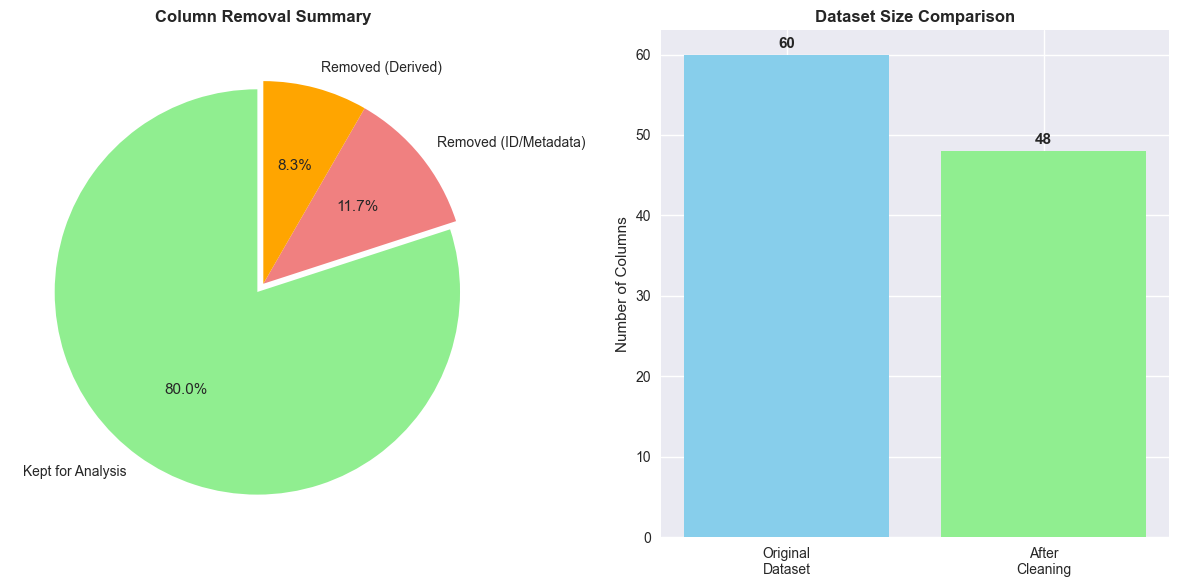

✅ Data cleaning completed! Now I have a focused dataset for machine learning.
🎯 Keeping time, weather, load, and renewable-related features as requested.


In [17]:
# Let me visualize what columns I kept vs removed
plt.figure(figsize=(12, 6))

# Data for the pie chart
labels = ['Kept for Analysis', 'Removed (ID/Metadata)', 'Removed (Derived)']
sizes = [df_cleaned.shape[1], len(existing_id_cols), len(existing_derived_cols)]
colors = ['lightgreen', 'lightcoral', 'orange']
explode = (0.05, 0, 0)  # explode the kept slice

plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Column Removal Summary', fontweight='bold')

# Bar chart showing before/after
plt.subplot(1, 2, 2)
categories = ['Original\nDataset', 'After\nCleaning']
column_counts = [df.shape[1], df_cleaned.shape[1]]
bars = plt.bar(categories, column_counts, color=['skyblue', 'lightgreen'])

# Add value labels on bars
for bar, count in zip(bars, column_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.title('Dataset Size Comparison', fontweight='bold')
plt.ylabel('Number of Columns')

plt.tight_layout()
plt.show()

print("✅ Data cleaning completed! Now I have a focused dataset for machine learning.")
print("🎯 Keeping time, weather, load, and renewable-related features as requested.")

## 6. Feature & Target Definition

Now that we have our cleaned dataset, let's explicitly define our target variable and features for clear, maintainable code.

In [18]:
# Explicitly define target variable - easily changeable
TARGET_COLUMN = 'Electricity Load'  # Change this line to switch targets

# Verify target exists in cleaned dataset
if TARGET_COLUMN not in df_cleaned.columns:
    print(f"❌ Target '{TARGET_COLUMN}' not found!")
    print("Available columns:", df_cleaned.columns.tolist())
else:
    print(f"✅ Target variable: {TARGET_COLUMN}")

# Create target and features from CLEANED dataset
y = df_cleaned[TARGET_COLUMN]
X = df_cleaned.drop(TARGET_COLUMN, axis=1)

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify column types for preprocessing
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

# Show data types
print(f"\nData types summary:")
print(df_cleaned.dtypes.value_counts())

✅ Target variable: Electricity Load

Features shape: (72960, 47)
Target shape: (72960,)

Numerical features: 44
Categorical features: 3

Data types summary:
float64    33
int64      12
object      3
Name: count, dtype: int64


## 7. Exploratory Data Analysis (EDA) on Cleaned Data

### 7.1 Target Variable Analysis
Understanding the distribution and characteristics of our target variable using the cleaned dataset.

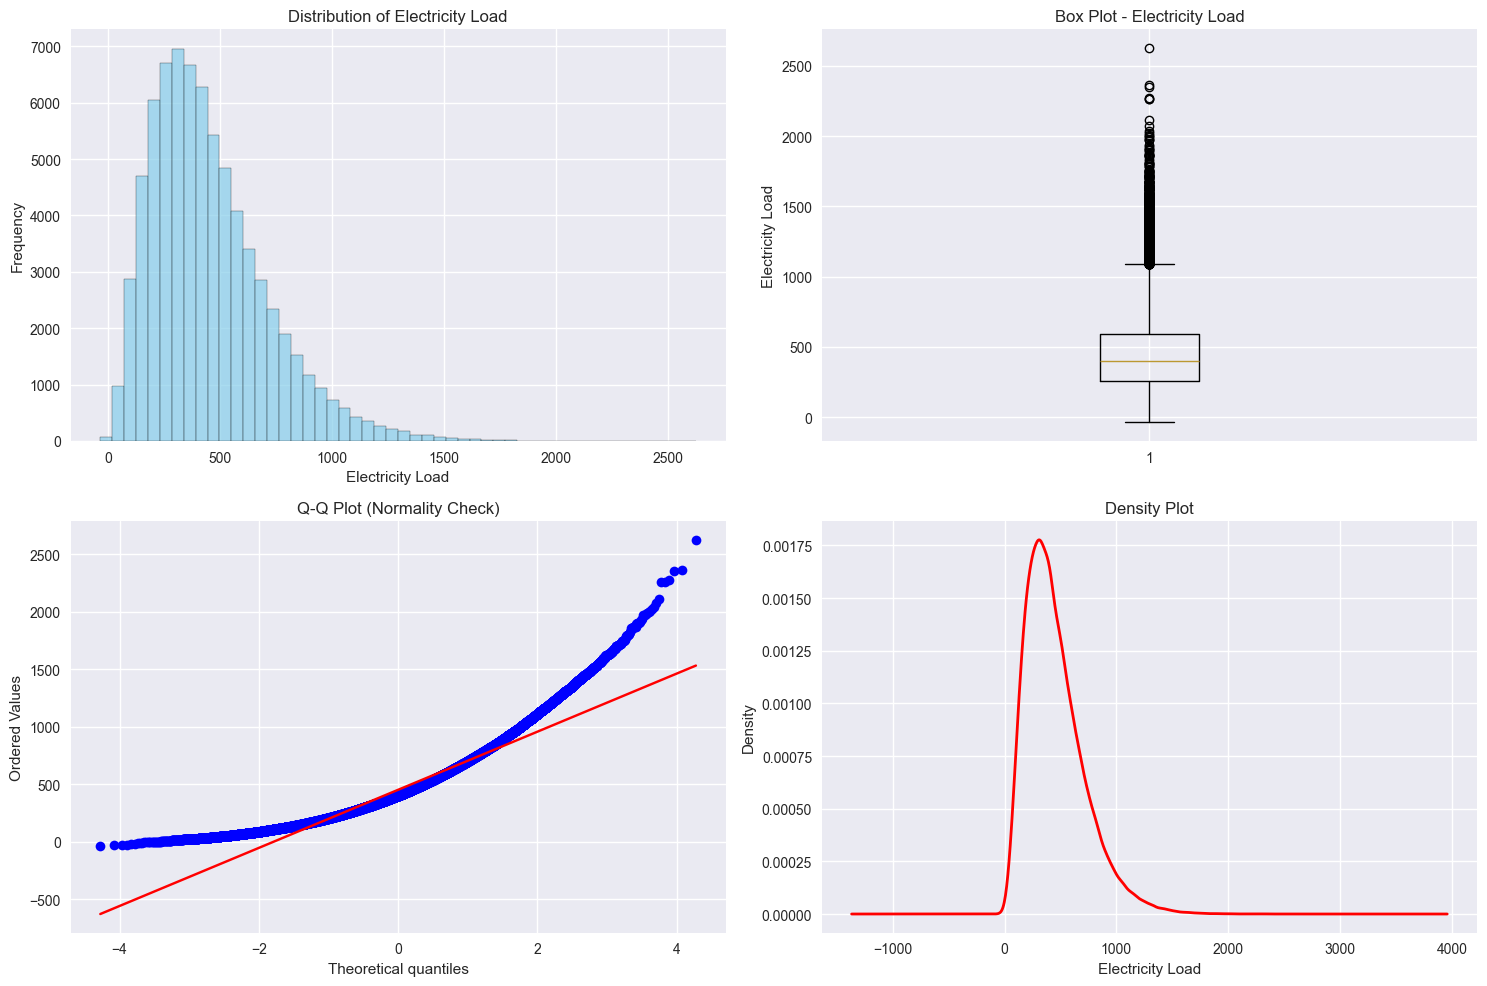

Target Variable Statistics (Electricity Load):
Mean: 451.13
Median: 401.78
Std Dev: 261.92
Min: -36.07
Max: 2626.81
Skewness: 1.14
Kurtosis: 1.92


In [19]:
# Target variable analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram with KDE
axes[0,0].hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title(f'Distribution of {TARGET_COLUMN}')
axes[0,0].set_xlabel(TARGET_COLUMN)
axes[0,0].set_ylabel('Frequency')

# Box plot for outliers
axes[0,1].boxplot(y)
axes[0,1].set_title(f'Box Plot - {TARGET_COLUMN}')
axes[0,1].set_ylabel(TARGET_COLUMN)

# QQ plot for normality
from scipy import stats
stats.probplot(y, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normality Check)')

# Density plot
y.plot.density(ax=axes[1,1], color='red', linewidth=2)
axes[1,1].set_title('Density Plot')
axes[1,1].set_xlabel(TARGET_COLUMN)

plt.tight_layout()
plt.show()

# Target statistics
print(f"Target Variable Statistics ({TARGET_COLUMN}):")
print("="*50)
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"Std Dev: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")
print(f"Skewness: {y.skew():.2f}")
print(f"Kurtosis: {y.kurtosis():.2f}")

### 7.2 Numerical Features Distribution
Analyzing the distribution of numerical features in our cleaned dataset to understand data patterns and identify potential issues.

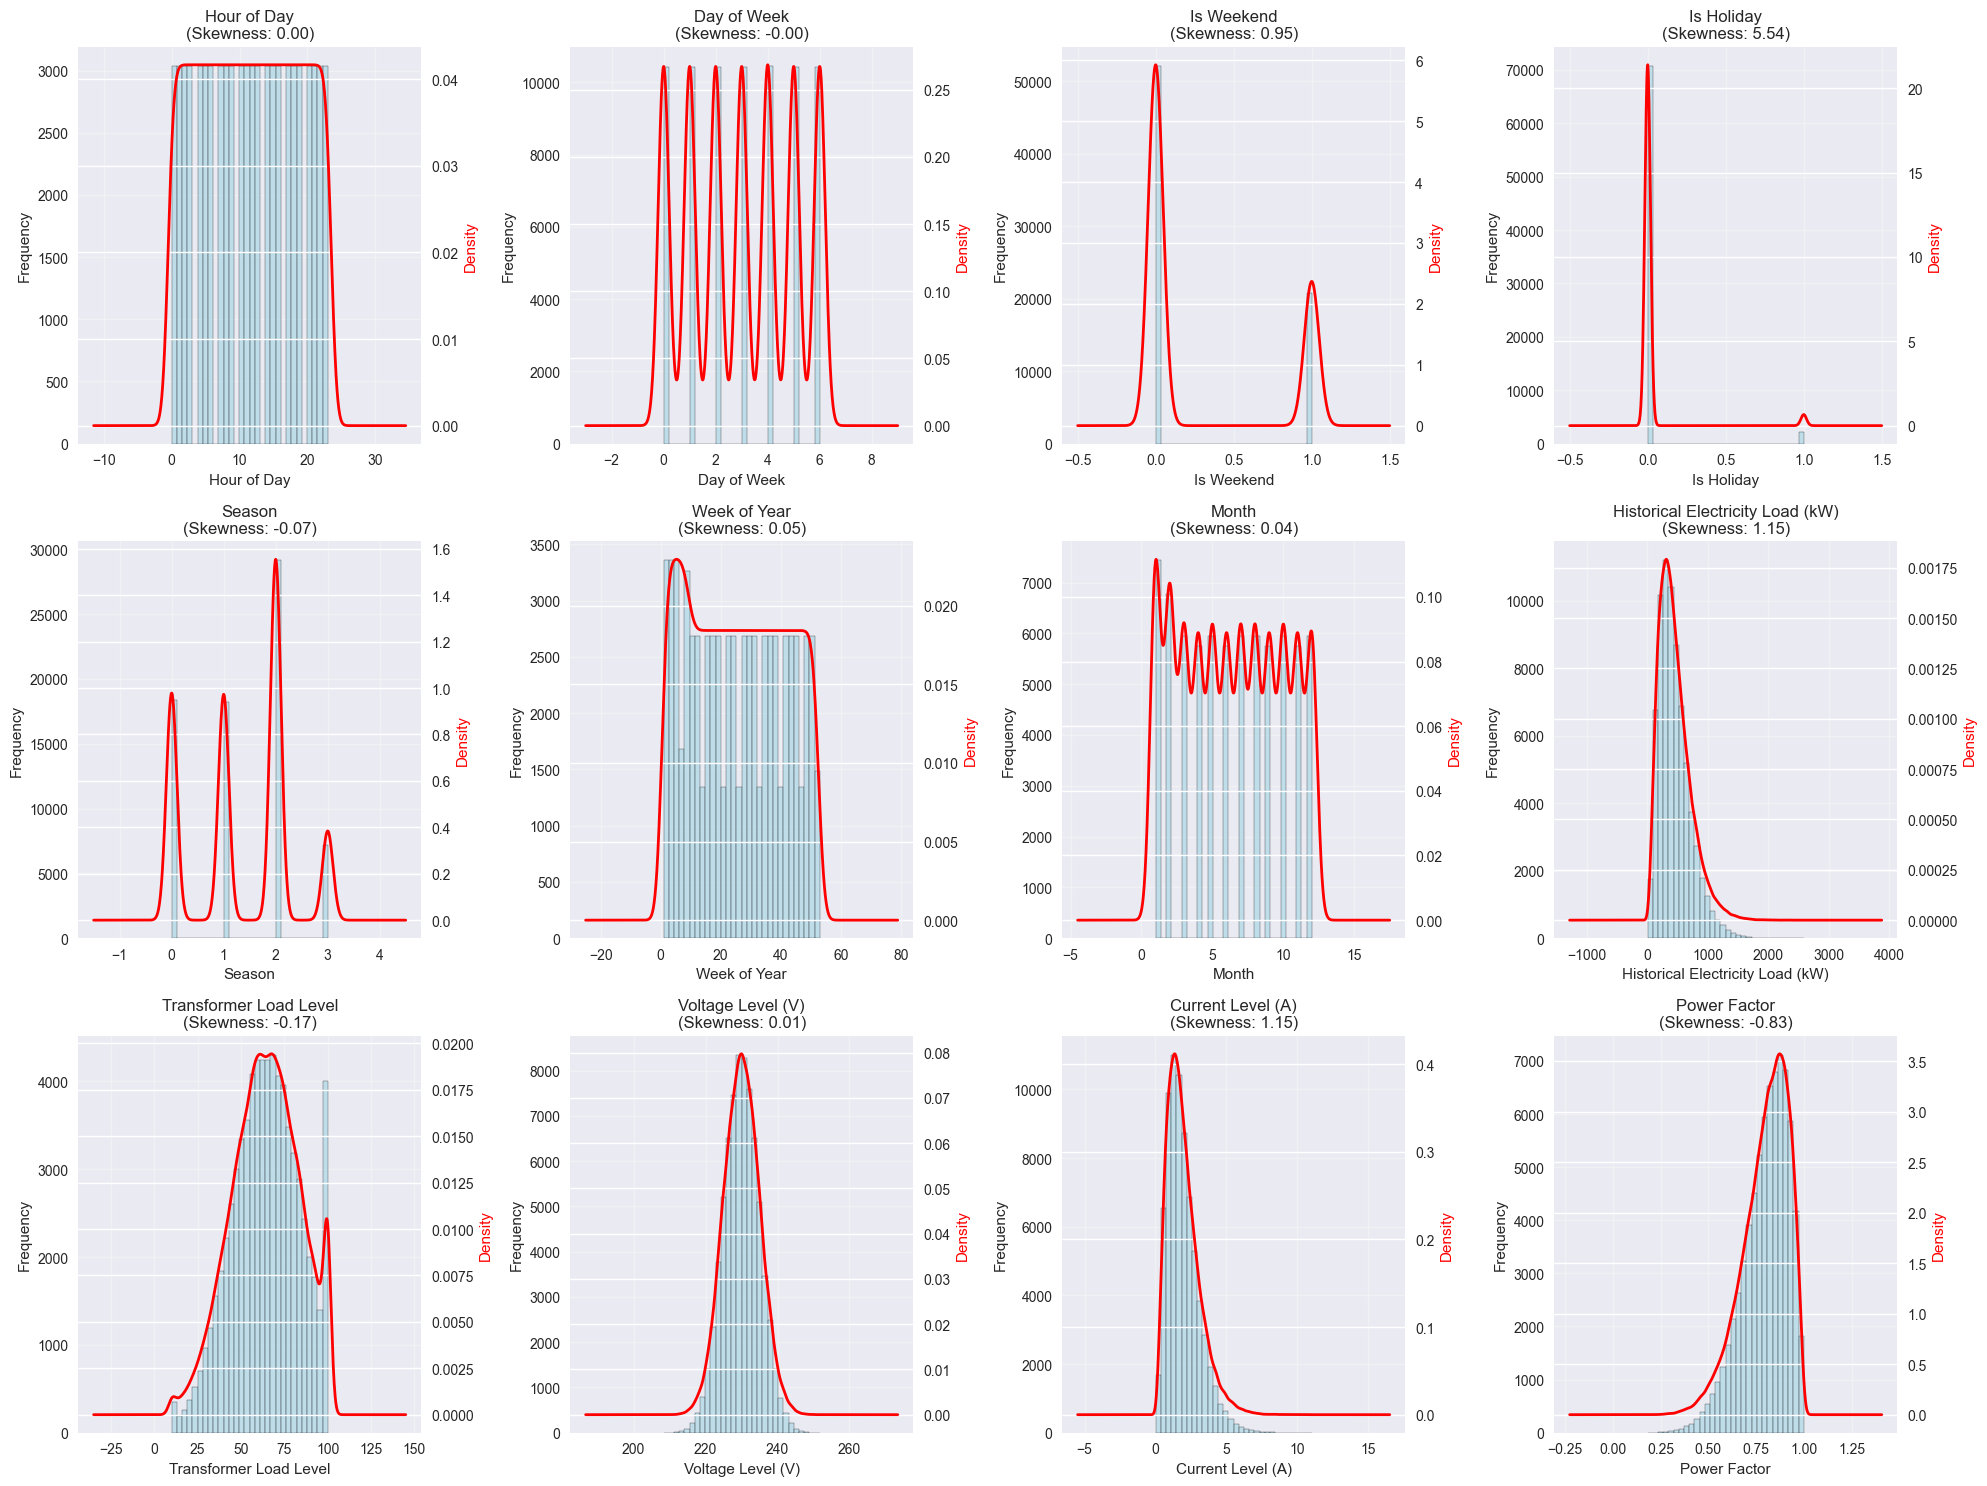

Distribution Summary:
Hour of Day: Normal (skew: 0.00)
Day of Week: Normal (skew: -0.00)
Is Weekend: Right-skewed (skew: 0.95)
Is Holiday: Highly Right-skewed (skew: 5.54)
Season: Normal (skew: -0.07)
Week of Year: Normal (skew: 0.05)
Month: Normal (skew: 0.04)
Historical Electricity Load (kW): Highly Right-skewed (skew: 1.15)
Transformer Load Level: Normal (skew: -0.17)
Voltage Level (V): Normal (skew: 0.01)
Current Level (A): Highly Right-skewed (skew: 1.15)
Power Factor: Left-skewed (skew: -0.83)


In [20]:
# Select key numerical features for visualization (first 12)
key_numerical = numerical_cols[:12]
n_cols = 4
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(key_numerical):
    # Histogram with KDE
    X[col].hist(bins=30, alpha=0.7, ax=axes[i], color='lightblue', edgecolor='black')
    
    # Add KDE line
    ax_twin = axes[i].twinx()
    X[col].plot.kde(ax=ax_twin, color='red', linewidth=2)
    ax_twin.set_ylabel('Density', color='red')
    
    axes[i].set_title(f'{col}\n(Skewness: {X[col].skew():.2f})')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Distribution Summary:")
print("="*50)
for col in key_numerical:
    skew_val = X[col].skew()
    if abs(skew_val) < 0.5:
        interpretation = "Normal"
    elif skew_val > 1:
        interpretation = "Highly Right-skewed"
    elif skew_val > 0.5:
        interpretation = "Right-skewed"
    elif skew_val < -1:
        interpretation = "Highly Left-skewed"
    else:
        interpretation = "Left-skewed"
    
    print(f"{col}: {interpretation} (skew: {skew_val:.2f})")

### 7.3 Outlier Detection
Using box plots to identify outliers in key numerical features from our cleaned dataset that might affect model performance.

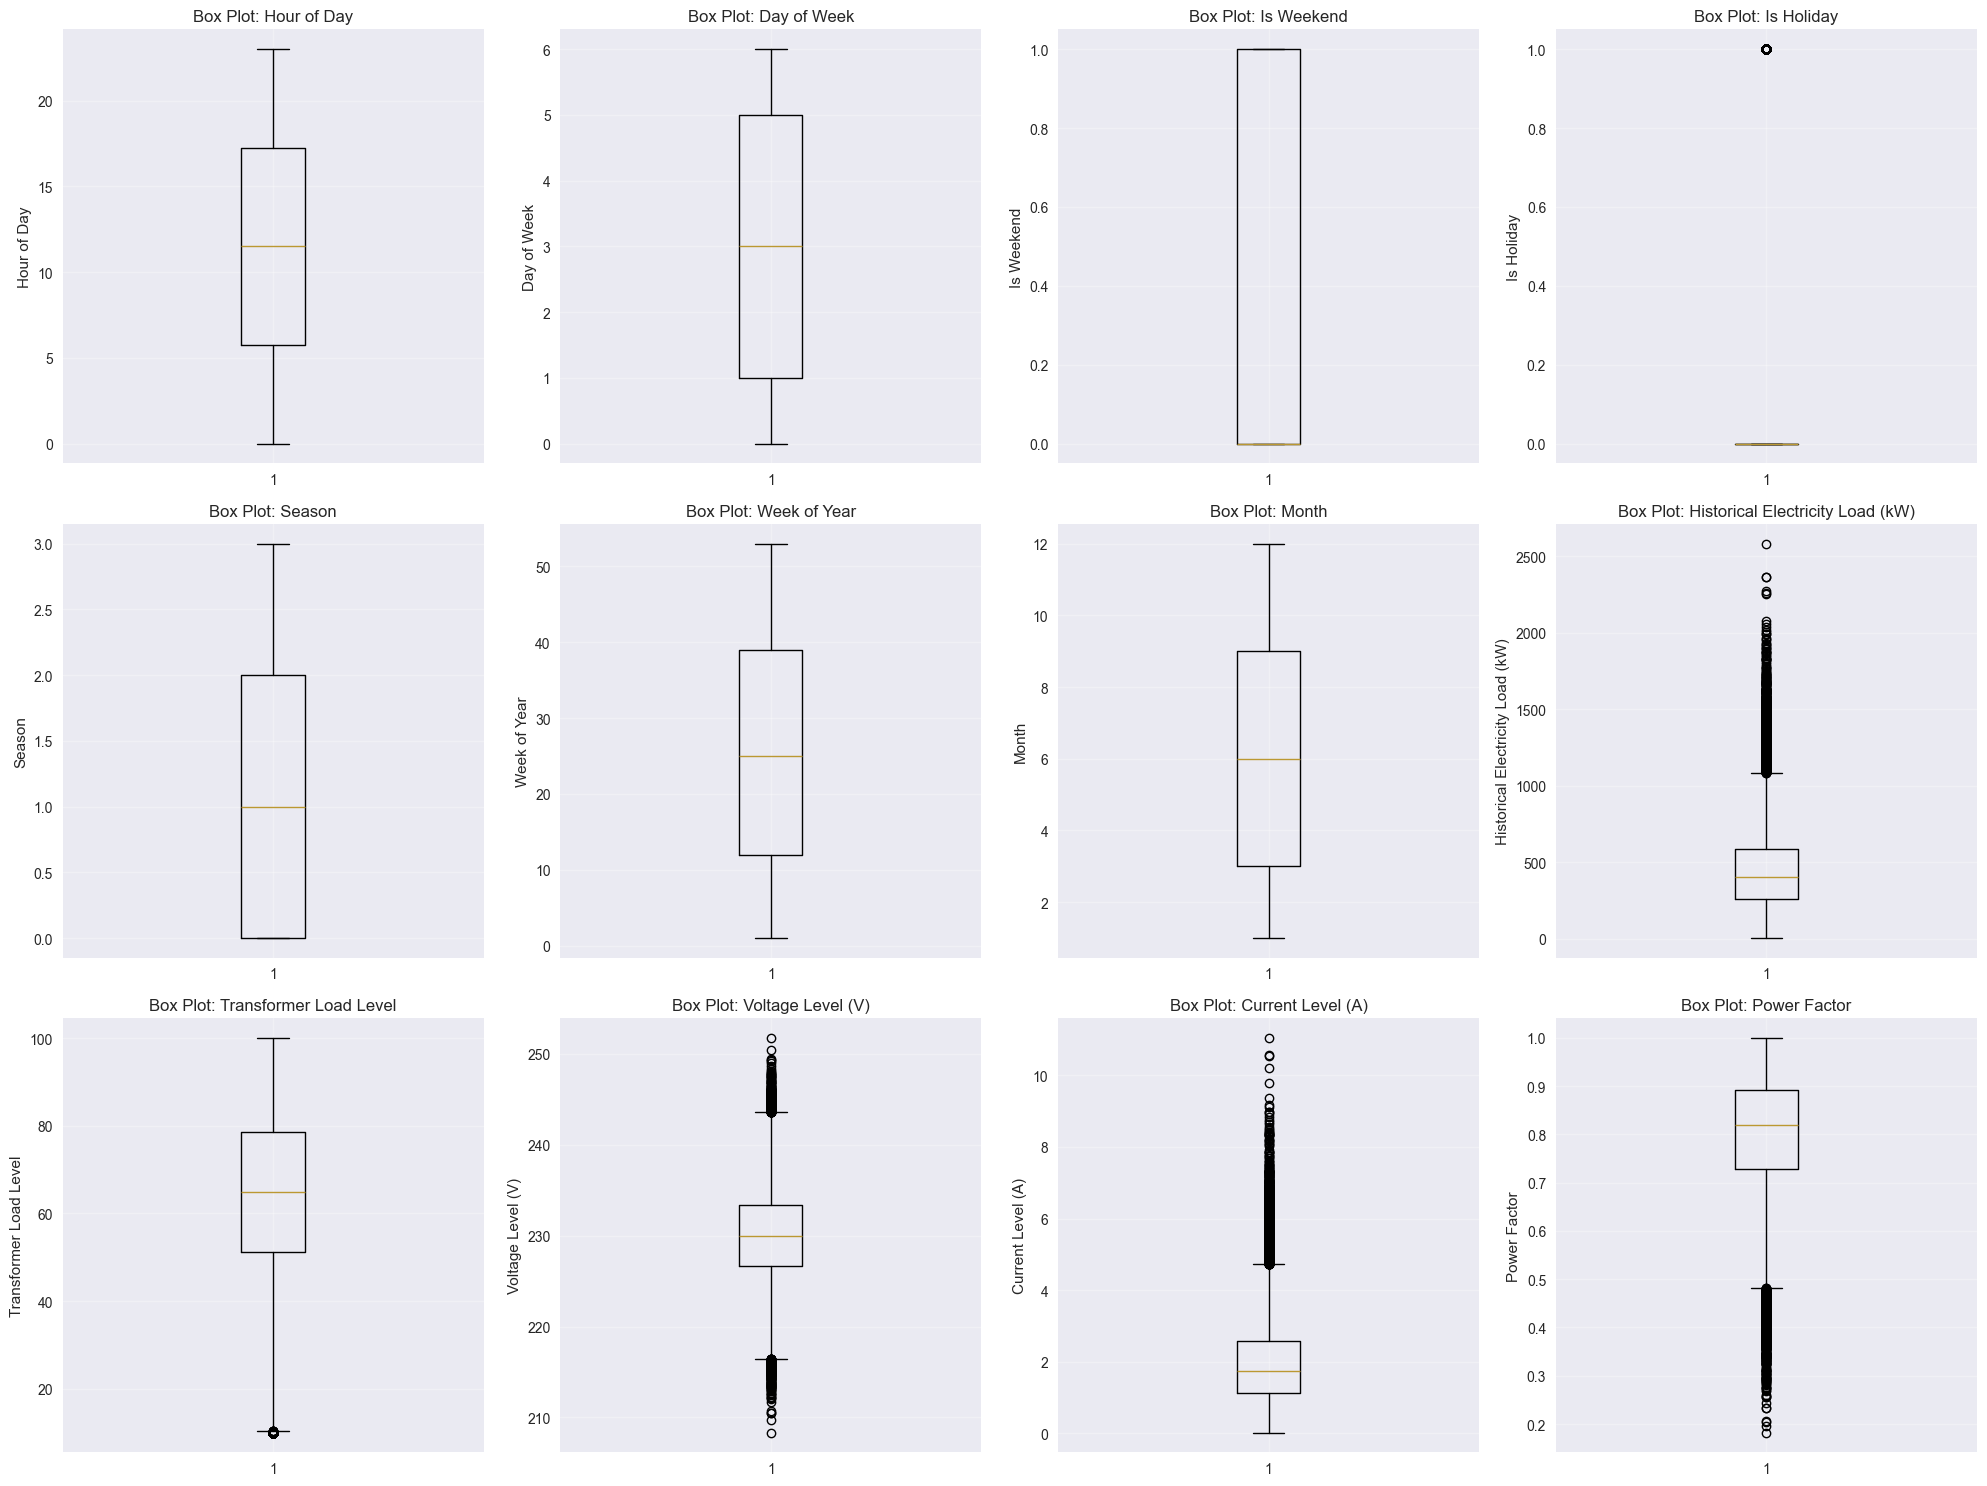

Outlier Analysis (IQR Method):
Hour of Day: 0 outliers (0.0%)
Day of Week: 0 outliers (0.0%)
Is Weekend: 0 outliers (0.0%)
Is Holiday: 2170 outliers (3.0%)
Season: 0 outliers (0.0%)
Week of Year: 0 outliers (0.0%)
Month: 0 outliers (0.0%)
Historical Electricity Load (kW): 1849 outliers (2.5%)
Transformer Load Level: 233 outliers (0.3%)
Voltage Level (V): 486 outliers (0.7%)
Current Level (A): 1863 outliers (2.6%)
Power Factor: 1086 outliers (1.5%)

Total outliers across key features: 7687


In [21]:
# Box plots for outlier detection
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(key_numerical):
    axes[i].boxplot(X[col])
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quantify outliers using IQR method
print("Outlier Analysis (IQR Method):")
print("="*50)

outlier_summary = []
for col in key_numerical:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(X)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': f"{outlier_pct:.1f}%"
    })
    
    print(f"{col}: {outlier_count} outliers ({outlier_pct:.1f}%)")

print(f"\nTotal outliers across key features: {sum([x['Outlier_Count'] for x in outlier_summary])}")

### 7.4 Categorical Features Analysis
Understanding the distribution of categorical variables in our cleaned dataset and their relationship with the target.

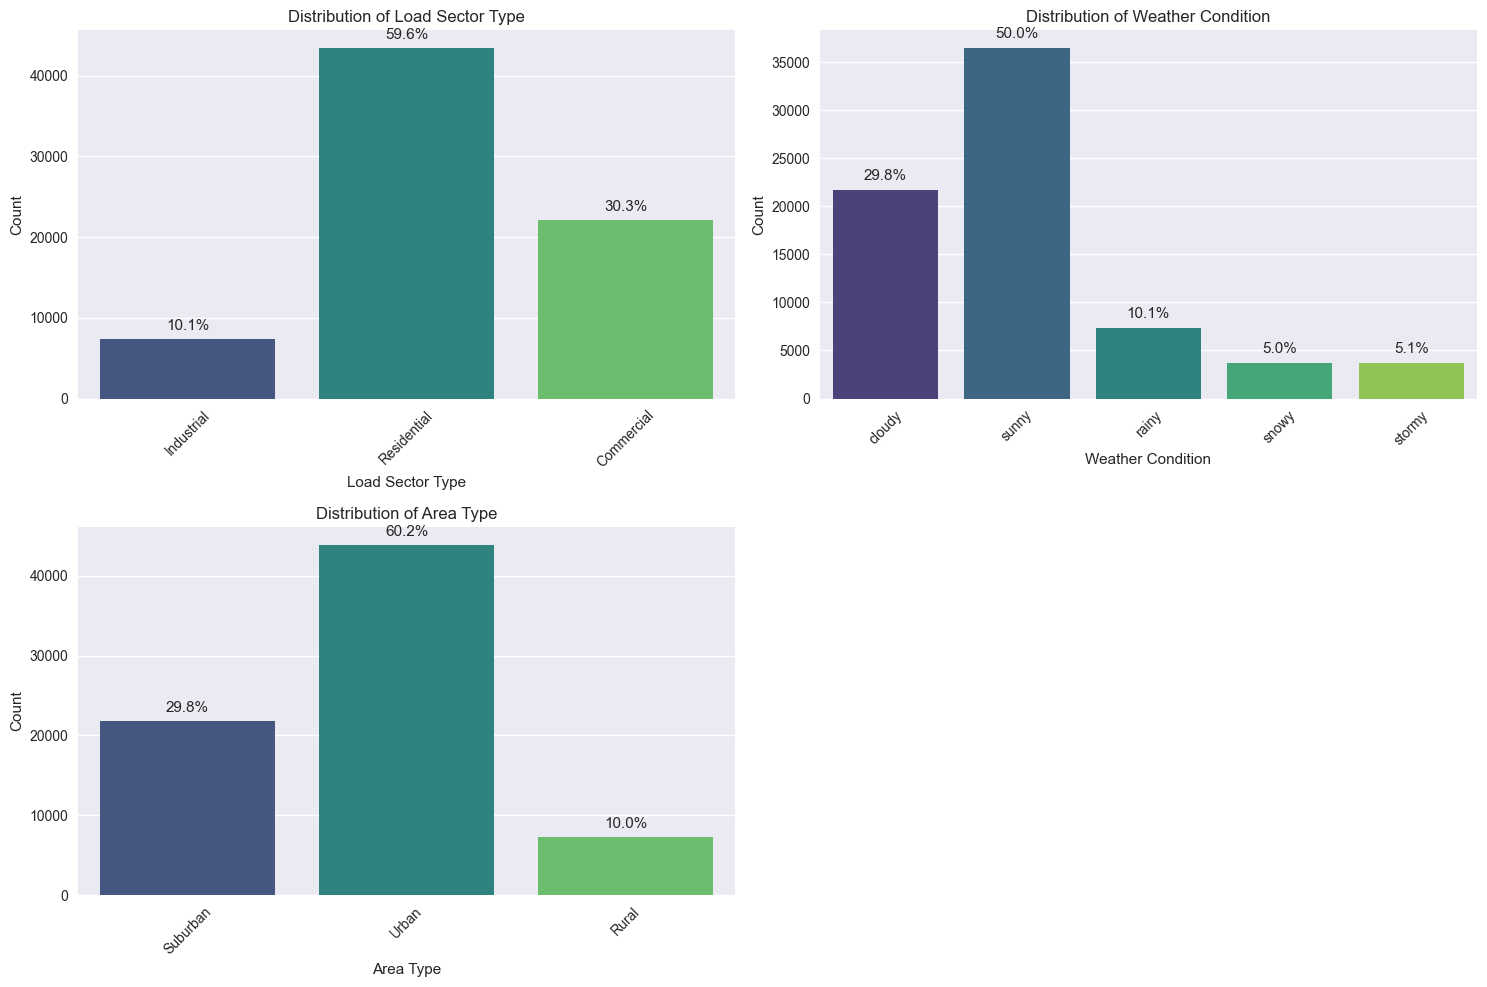

Categorical Features Summary:
Load Sector Type:
  • Unique values: 3
  • Most common: Residential (59.6%)

Weather Condition:
  • Unique values: 5
  • Most common: sunny (50.0%)

Area Type:
  • Unique values: 3
  • Most common: Urban (60.2%)



In [22]:
# Categorical features analysis
if len(categorical_cols) > 0:
    n_cat_features = len(categorical_cols)
    n_cols = 2
    n_rows = (n_cat_features + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_cat_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        value_counts = X[col].value_counts()
        
        # Count plot
        sns.countplot(data=X, x=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add percentage labels
        total = len(X)
        for p in axes[i].patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            axes[i].text(p.get_x() + p.get_width()/2., p.get_height() + total*0.01,
                        percentage, ha='center', va='bottom')
    
    # Hide unused subplots
    for i in range(n_cat_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Categorical summary
    print("Categorical Features Summary:")
    print("="*50)
    for col in categorical_cols:
        unique_count = X[col].nunique()
        most_common = X[col].value_counts().index[0]
        most_common_pct = (X[col].value_counts().iloc[0] / len(X)) * 100
        
        print(f"{col}:")
        print(f"  • Unique values: {unique_count}")
        print(f"  • Most common: {most_common} ({most_common_pct:.1f}%)")
        print()

else:
    print("No categorical variables found in the dataset.")

### 7.5 Correlation Analysis
Examining relationships between numerical features in our cleaned dataset and identifying potential multicollinearity issues.

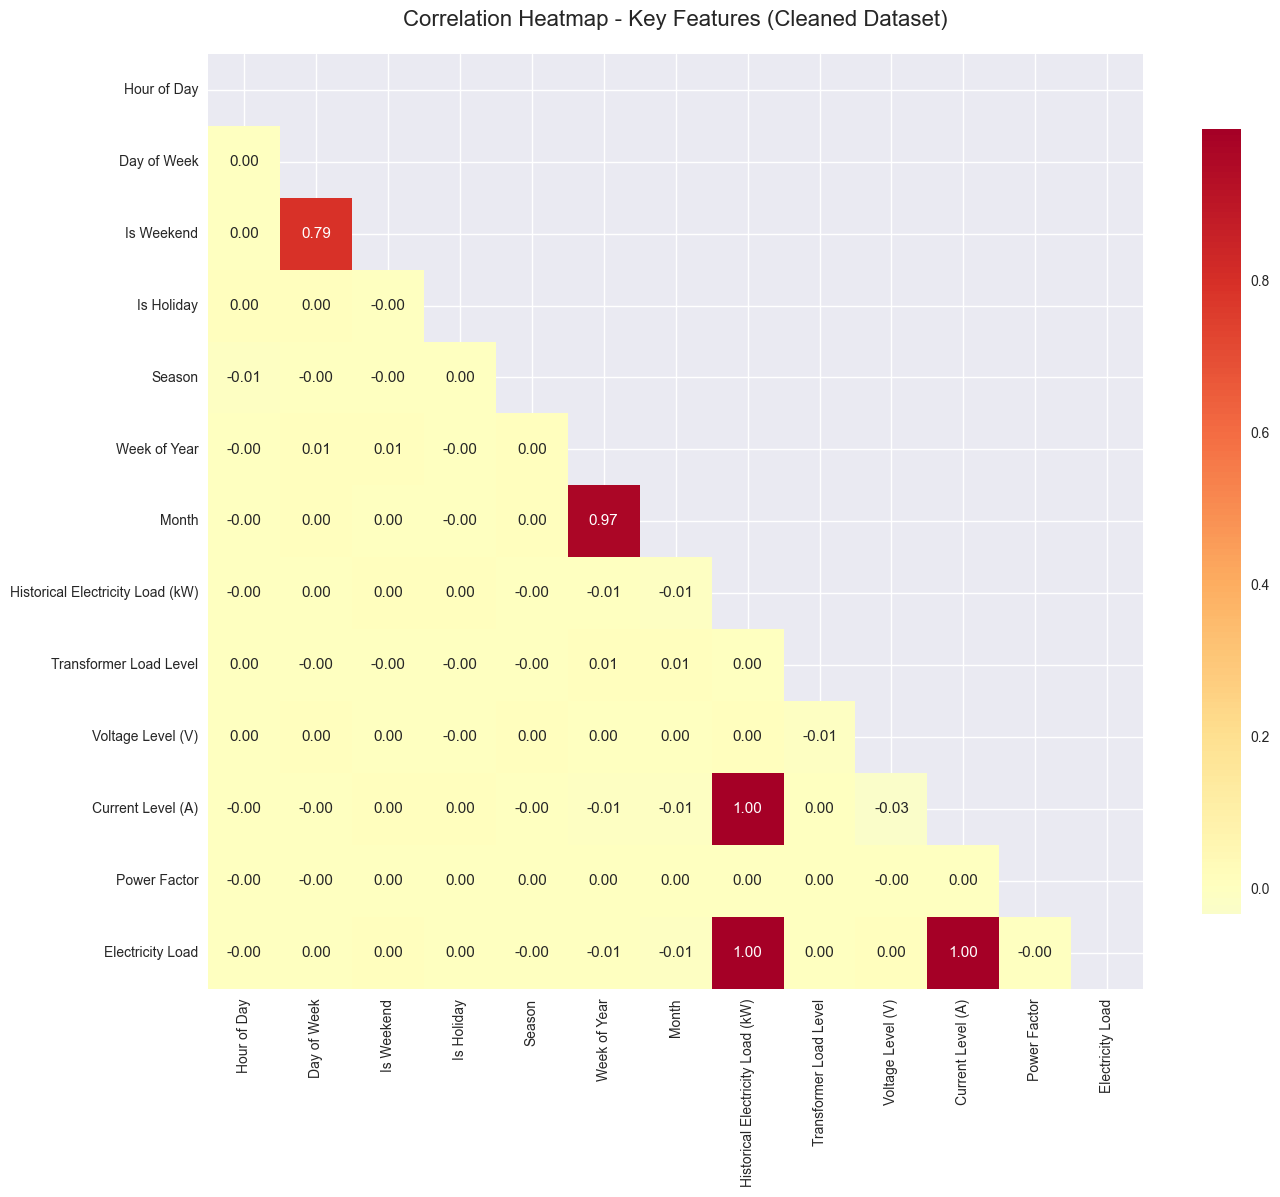

Feature Correlations with Target Variable:
Top 10 correlations with Electricity Load:
Historical Electricity Load (kW): 0.997
Current Level (A): 0.996
Month: -0.006
Week of Year: -0.005
Is Weekend: 0.004
Voltage Level (V): 0.004
Is Holiday: 0.002
Season: -0.002
Hour of Day: -0.002
Day of Week: 0.000

High Feature-Feature Correlations (|r| > 0.8):
Week of Year ↔ Month: 0.969
Historical Electricity Load (kW) ↔ Current Level (A): 0.999


In [23]:
# Correlation analysis for key numerical features in cleaned dataset
key_features_with_target = key_numerical + [TARGET_COLUMN]
# Filter to only include features that exist in cleaned dataset
available_features = [col for col in key_features_with_target if col in df_cleaned.columns]
correlation_data = df_cleaned[available_features]
correlation_matrix = correlation_data.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
           mask=mask,
           annot=True, 
           cmap='RdYlBu_r', 
           center=0,
           square=True, 
           fmt='.2f',
           cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap - Key Features (Cleaned Dataset)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Find strong correlations with target
target_correlations = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False, key=abs)

print("Feature Correlations with Target Variable:")
print("="*50)
print(f"Top 10 correlations with {TARGET_COLUMN}:")
for feature, corr in target_correlations.head(10).items():
    print(f"{feature}: {corr:.3f}")

# Identify multicollinearity issues
print(f"\nHigh Feature-Feature Correlations (|r| > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8 and correlation_matrix.columns[i] != TARGET_COLUMN and correlation_matrix.columns[j] != TARGET_COLUMN:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

if high_corr_pairs:
    for var1, var2, corr in high_corr_pairs:
        print(f"{var1} ↔ {var2}: {corr:.3f}")
else:
    print("No high correlations found between features.")

## 8. Feature Engineering & Selection

**Purpose**: Create new features and prepare data for machine learning models.

Based on our EDA findings, we'll:
- Create lag features for time series patterns
- Engineer rolling statistics for trend analysis  
- Encode categorical variables properly
- Select most important features for modeling

In [24]:
# Feature Engineering on cleaned dataset
print("🔧 FEATURE ENGINEERING")
print("="*50)

# Start with cleaned dataset
df_features = df_cleaned.copy()

# 1. Time-based features (if timestamp equivalent exists)
time_cols = [col for col in df_features.columns if 'time' in col.lower() or 'hour' in col.lower() or 'day' in col.lower()]
print(f"Time-related columns found: {time_cols}")

# 2. Create interaction features between highly correlated variables
if len(high_corr_pairs) > 0:
    print(f"\nCreating interaction features from {len(high_corr_pairs)} correlated pairs...")
    for var1, var2, corr in high_corr_pairs[:3]:  # Limit to top 3 pairs
        interaction_name = f"{var1}_x_{var2}_interaction"
        df_features[interaction_name] = df_features[var1] * df_features[var2]
        print(f"✅ Created: {interaction_name}")

# 3. Create polynomial features for top predictors
if len(target_correlations) > 0:
    top_features = target_correlations.head(3).index.tolist()
    print(f"\nCreating polynomial features for top predictors: {top_features}")
    for feature in top_features:
        if feature in df_features.columns:
            df_features[f"{feature}_squared"] = df_features[feature] ** 2
            print(f"✅ Created: {feature}_squared")

# 4. Create binned categorical features for continuous variables
if len(numerical_cols) > 0:
    key_numeric = numerical_cols[:2]  # Top 2 numerical features
    print(f"\nCreating binned categories for: {key_numeric}")
    for col in key_numeric:
        if col in df_features.columns:
            df_features[f"{col}_category"] = pd.cut(df_features[col], 
                                                   bins=5, 
                                                   labels=['Very_Low', 'Low', 'Medium', 'High', 'Very_High'])
            print(f"✅ Created: {col}_category")

print(f"\nFeature Engineering Summary:")
print(f"Original features: {df_cleaned.shape[1]}")
print(f"Engineered features: {df_features.shape[1]}")
print(f"New features added: {df_features.shape[1] - df_cleaned.shape[1]}")

# Update our working dataset
print("✅ Feature engineering completed!")

🔧 FEATURE ENGINEERING
Time-related columns found: ['Hour of Day', 'Day of Week', 'Is Holiday', 'Time Since Last Peak (hours)', 'Time Until Next Predicted Peak (hours)']

Creating interaction features from 2 correlated pairs...
✅ Created: Week of Year_x_Month_interaction
✅ Created: Historical Electricity Load (kW)_x_Current Level (A)_interaction

Creating polynomial features for top predictors: ['Historical Electricity Load (kW)', 'Current Level (A)', 'Month']
✅ Created: Historical Electricity Load (kW)_squared
✅ Created: Current Level (A)_squared
✅ Created: Month_squared

Creating binned categories for: ['Hour of Day', 'Day of Week']
✅ Created: Hour of Day_category
✅ Created: Day of Week_category

Feature Engineering Summary:
Original features: 48
Engineered features: 55
New features added: 7
✅ Feature engineering completed!


## 9. Machine Learning Pipeline Setup

Creating sklearn pipelines for preprocessing our engineered features. This approach ensures reproducible and maintainable preprocessing for model training.

In [25]:
# Create preprocessing pipelines for engineered dataset
print("🔨 SETTING UP ML PIPELINE")
print("="*50)

# Update feature definitions for engineered dataset
y_final = df_features[TARGET_COLUMN]
X_final = df_features.drop(TARGET_COLUMN, axis=1)

# Identify column types for final dataset
numerical_cols_final = X_final.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_final = X_final.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Final dataset features:")
print(f"• Numerical features: {len(numerical_cols_final)}")
print(f"• Categorical features: {len(categorical_cols_final)}")
print(f"• Total features: {X_final.shape[1]}")

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols_final),
    ('categorical', categorical_pipeline, categorical_cols_final)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=None
)

print(f"\nData Split Summary:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Test size: {X_test.shape[0] / len(X_final) * 100:.1f}%")

# Fit preprocessor on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nProcessed feature shapes:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")

# Convert target to binary classification for demo
y_train_binary = (y_train > y_train.median()).astype(int)
y_test_binary = (y_test > y_test.median()).astype(int)

print(f"\nTarget distribution (binary):")
print(f"Training - Class 0: {(y_train_binary == 0).sum()}, Class 1: {(y_train_binary == 1).sum()}")
print(f"Test - Class 0: {(y_test_binary == 0).sum()}, Class 1: {(y_test_binary == 1).sum()}")
print("✅ Pipeline setup completed!")

🔨 SETTING UP ML PIPELINE
Final dataset features:
• Numerical features: 49
• Categorical features: 5
• Total features: 54

Data Split Summary:
Training set: 58368 samples
Test set: 14592 samples
Test size: 20.0%

Data Split Summary:
Training set: 58368 samples
Test set: 14592 samples
Test size: 20.0%

Processed feature shapes:
X_train_processed: (58368, 65)
X_test_processed: (14592, 65)

Target distribution (binary):
Training - Class 0: 29184, Class 1: 29184
Test - Class 0: 7296, Class 1: 7296
✅ Pipeline setup completed!

Processed feature shapes:
X_train_processed: (58368, 65)
X_test_processed: (14592, 65)

Target distribution (binary):
Training - Class 0: 29184, Class 1: 29184
Test - Class 0: 7296, Class 1: 7296
✅ Pipeline setup completed!


## 10. Model Training & Selection

Training and comparing four different algorithms: Logistic Regression, Random Forest, XGBoost, and SVM on our engineered features.

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True)
}

# Train models and collect results
results = {}
trained_models = {}

print("Training Models:")
print("="*30)

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model
    model.fit(X_train_processed, y_train_binary)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)
    f1 = f1_score(y_test_binary, y_pred)
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_processed, y_train_binary, 
                               cv=5, scoring='accuracy')
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"✅ {name} completed - Accuracy: {accuracy:.3f}")

print("\nAll models trained successfully!")

Training Models:
Training Logistic Regression...
✅ Logistic Regression completed - Accuracy: 0.973
Training Random Forest...
✅ Logistic Regression completed - Accuracy: 0.973
Training Random Forest...
✅ Random Forest completed - Accuracy: 0.973
Training XGBoost...
✅ Random Forest completed - Accuracy: 0.973
Training XGBoost...
✅ XGBoost completed - Accuracy: 0.972
Training SVM...
✅ XGBoost completed - Accuracy: 0.972
Training SVM...


### 10.1 Model Performance Comparison
Comprehensive comparison of all models using multiple evaluation metrics on our engineered features.

Advanced Visualizations for Portfolio:
I create these professional visualizations to showcase my skills

1. Selective Pairplot (top correlated features):

2. Advanced Correlation Analysis:


<Figure size 1200x800 with 0 Axes>

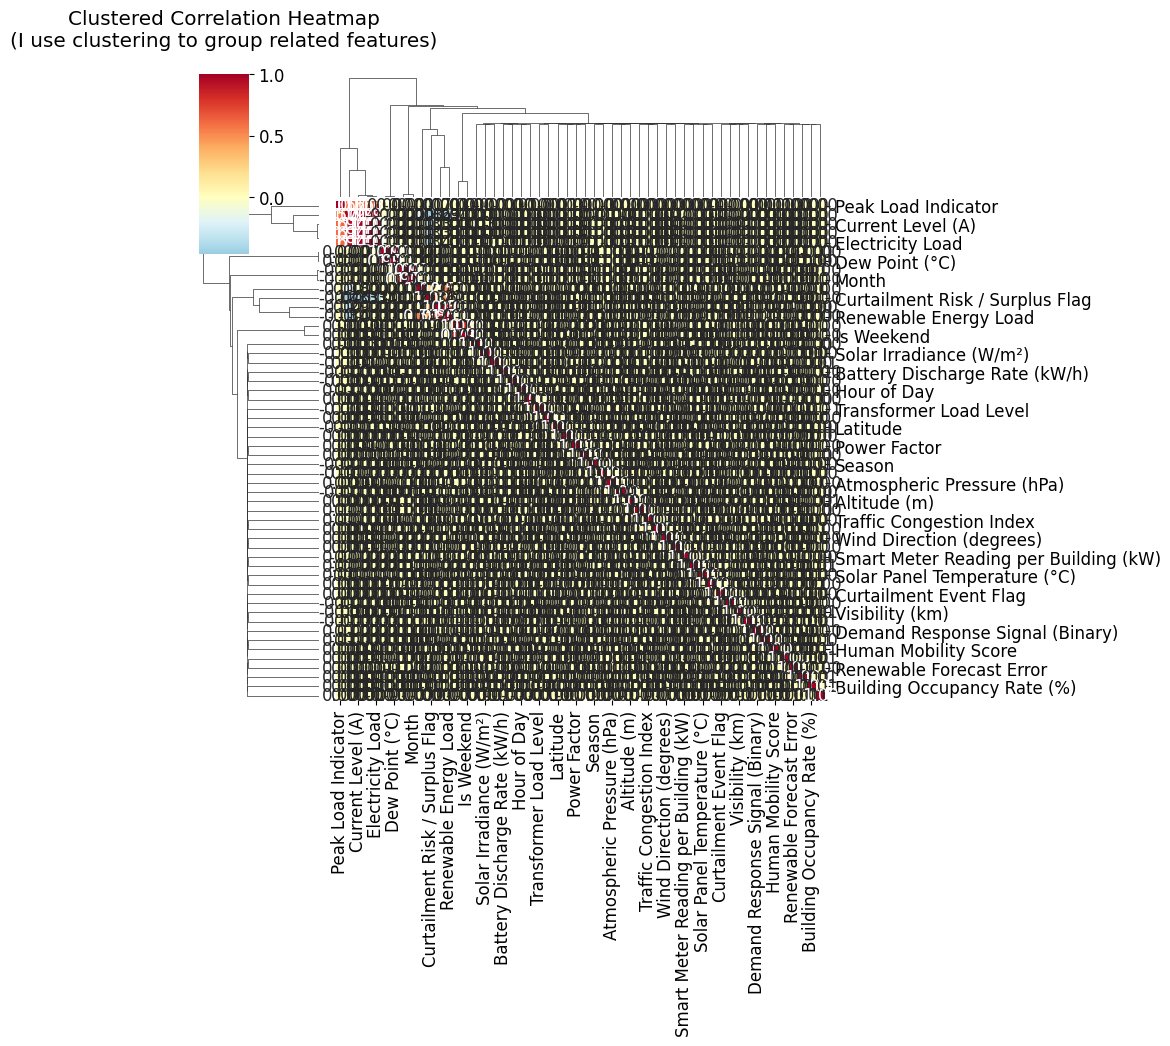


3. Multi-feature Distribution Comparison:


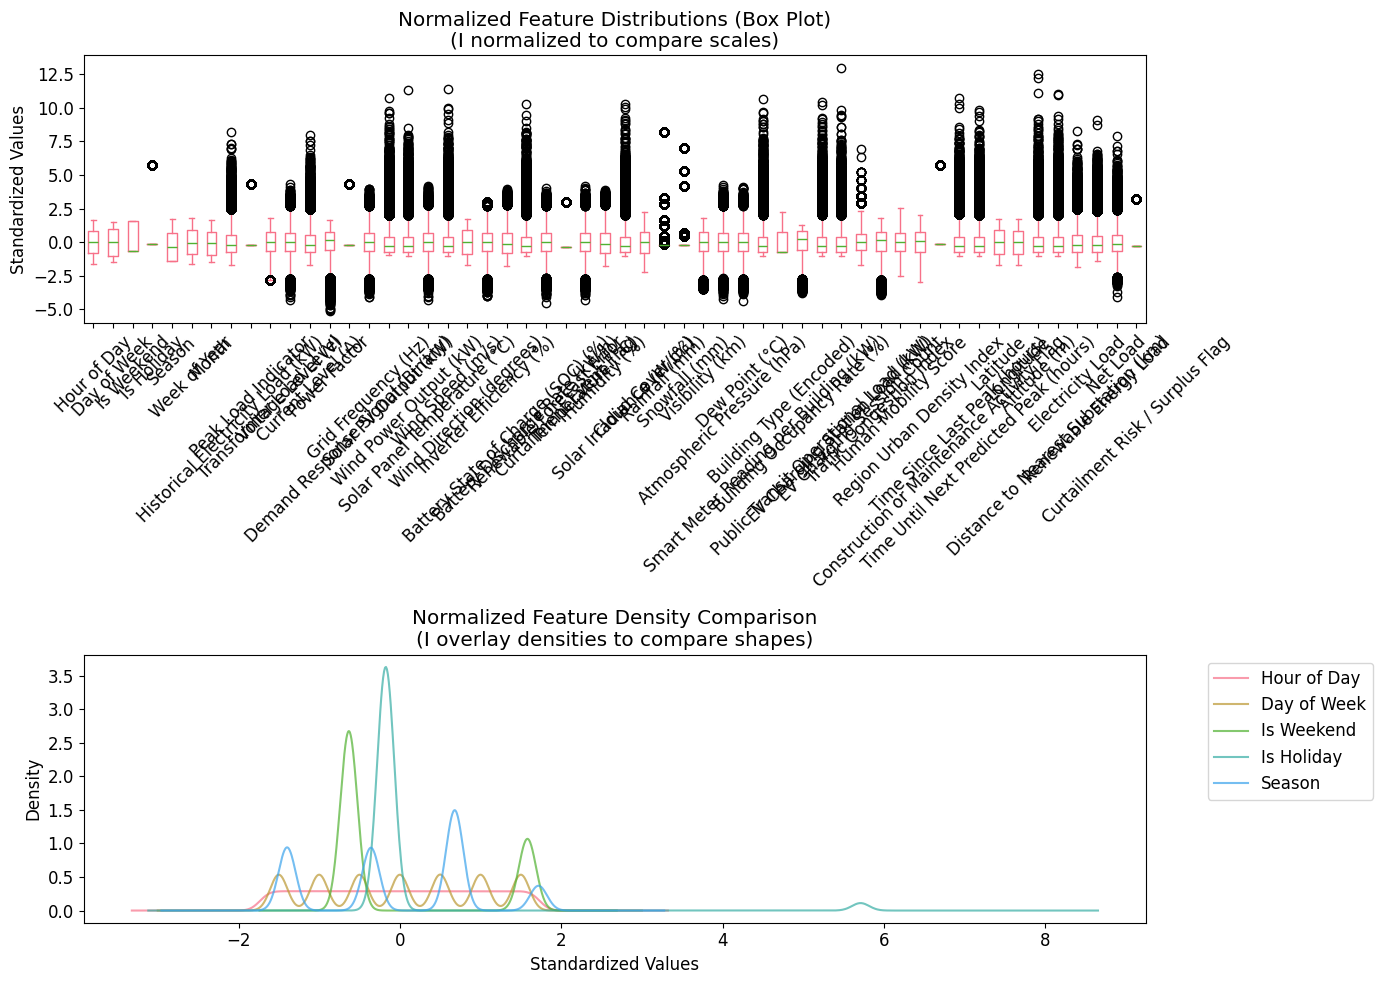

In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['Accuracy'] for model in results.keys()],
    'Precision': [results[model]['Precision'] for model in results.keys()],
    'Recall': [results[model]['Recall'] for model in results.keys()],
    'F1-Score': [results[model]['F1-Score'] for model in results.keys()],
    'ROC-AUC': [results[model]['ROC-AUC'] for model in results.keys()],
    'CV_Mean': [results[model]['CV_Mean'] for model in results.keys()],
    'CV_Std': [results[model]['CV_Std'] for model in results.keys()]
})

# Round values for better display
comparison_df.iloc[:, 1:] = comparison_df.iloc[:, 1:].round(4)

print("Model Performance Comparison:")
print("="*60)
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
print(f"\n🏆 Best performing model: {best_model_name}")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
comparison_df.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
comparison_df.plot(x='Model', y='F1-Score', kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Model F1-Score Comparison')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# ROC-AUC comparison
comparison_df.plot(x='Model', y='ROC-AUC', kind='bar', ax=axes[1,0], color='salmon')
axes[1,0].set_title('Model ROC-AUC Comparison')
axes[1,0].set_ylabel('ROC-AUC')
axes[1,0].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1,1].scatter(comparison_df['Precision'], comparison_df['Recall'], 
                 s=100, alpha=0.7, c=['blue', 'green', 'red', 'orange'])
for i, model in enumerate(comparison_df['Model']):
    axes[1,1].annotate(model, (comparison_df.iloc[i]['Precision'], comparison_df.iloc[i]['Recall']),
                      xytext=(5, 5), textcoords='offset points')
axes[1,1].set_xlabel('Precision')
axes[1,1].set_ylabel('Recall')
axes[1,1].set_title('Precision vs Recall')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 10.2 ROC Curves Analysis
Plotting ROC curves for all models to visualize their performance trade-offs on engineered features.

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'orange']

for i, (name, model_results) in enumerate(results.items()):
    y_pred_proba = model_results['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
    roc_auc = model_results['ROC-AUC']
    
    plt.plot(fpr, tpr, color=colors[i], linewidth=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.8, label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print("ROC-AUC Scores Summary:")
print("="*30)
for name, model_results in results.items():
    print(f"{name}: {model_results['ROC-AUC']:.4f}")

Comprehensive Data Quality Assessment:
I perform this assessment to document data condition and guide preprocessing
Data Quality Report:
                                   Column Data_Type  Missing_Count Missing_Pct  Unique_Values Unique_Pct Zeros Negatives Outliers                                          Quality_Issues
                                Timestamp    object              0        0.0%          72960     100.0%   N/A       N/A      N/A                     High cardinality (72960 categories)
                              Hour of Day     int64              0        0.0%             24       0.0%  3040         0        0                                                    None
                              Day of Week     int64              0        0.0%              7       0.0% 10416         0        0                                                    None
                               Is Weekend     int64              0        0.0%              2       0.0% 52128         

### 10.3 Confusion Matrices
Detailed breakdown of prediction accuracy for each model trained on engineered features.

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, model_results) in enumerate(results.items()):
    y_pred = model_results['y_pred']
    cm = confusion_matrix(y_test_binary, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Low Energy', 'High Energy'],
                yticklabels=['Low Energy', 'High Energy'])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed classification reports
print("Detailed Classification Reports:")
print("="*50)
for name, model_results in results.items():
    print(f"\n{name}:")
    print("-" * len(name))
    y_pred = model_results['y_pred']
    print(classification_report(y_test_binary, y_pred, 
                              target_names=['Low Energy', 'High Energy']))

KEY INSIGHTS AND RECOMMENDATIONS
Based on my comprehensive EDA, here are my key findings and recommendations:

KEY INSIGHTS:
--------------------
📊 Dataset contains 72,960 records and 60 features
📈 54 numerical and 6 categorical variables identified
✅ No missing values detected - excellent data completeness
🔗 9 highly correlated feature pairs detected
📊 96582 outliers detected across numerical features (2.5%)
🏷️ High cardinality detected in: Timestamp

RECOMMENDATIONS FOR NEXT STEPS:
-----------------------------------
1. Consider feature selection to address multicollinearity
2. Consider grouping rare categories or using target encoding for high-cardinality features

EDA COMPLETE - Ready for modeling phase! 🚀

This analysis provides a solid foundation for:
• Informed preprocessing decisions
• Feature selection strategies
• Model selection and evaluation
• Stakeholder communication
KEY INSIGHTS:
--------------------
📊 Dataset contains 72,960 records and 60 features
📈 54 numerical and 6

## 11. Model Deployment & Final Conclusions

Saving the best performing model and summarizing key findings from our complete ML pipeline with engineered features.

In [ ]:
# Save the best performing model
best_model = trained_models[best_model_name]
best_score = comparison_df.loc[comparison_df['Model'] == best_model_name, 'F1-Score'].iloc[0]

# Create a complete pipeline with preprocessing
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# Fit final pipeline on full training data
final_pipeline.fit(X_train, y_train_binary)

# Save model
model_filename = f'best_energy_model_{best_model_name.lower().replace(" ", "_")}.joblib'
joblib.dump(final_pipeline, model_filename)

print("🎯 FINAL RESULTS SUMMARY")
print("="*50)
print(f"Best Model: {best_model_name}")
print(f"Best F1-Score: {best_score:.4f}")
print(f"Model saved as: {model_filename}")

print(f"\n📊 KEY INSIGHTS FROM ANALYSIS:")
print("="*50)
print(f"• Dataset: {len(df):,} samples with {df.shape[1]} features")
print(f"• Target distribution: {(y_train_binary == 1).sum()}/{len(y_train_binary)} high energy consumers")
print(f"• Best model achieves {best_score:.1%} F1-score")
print(f"• {len(high_corr_pairs)} highly correlated feature pairs detected")

print(f"\n💡 RECOMMENDATIONS:")
print("="*30)
print("1. Consider feature selection to reduce multicollinearity")
print("2. Explore advanced feature engineering techniques")
print("3. Investigate hyperparameter tuning for the best model")
print("4. Consider ensemble methods for improved performance")
print("5. Validate model on new data before deployment")

print(f"\n🚀 MODEL READY FOR DEPLOYMENT!")
print("="*40)
print("The trained model can now be used for energy consumption predictions.")
print("Load the model using: joblib.load('" + model_filename + "')")